In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import entropy
from matplotlib.collections import LineCollection
from sklearn.metrics import RocCurveDisplay
from pycaret.anomaly import *
from sklearn.preprocessing import MinMaxScaler

In [2]:
col = ['eth.src', 'eth.dst', 'ip.src', 'ip.dst', 'ip.len', 'ip.ttl', 'ip.proto', 'attack']
# col = ['eth.src', 'eth.dst', 'ip.src', 'ip.dst', 'ip.proto', 'tcp.srcport', 'tcp.dstport','tcp.time_delta','tcp.flags','attack']
# data = pd.read_csv('testsets/raw/ics.csv')
# time = data['time'].unique().shape[0]
# file_entropy = np.zeros((time,data.shape[1]))
# attack_entropy = np.zeros((time,))


In [3]:
def calc_entropy(value):
    uvalue,counts = np.unique(value, return_counts=True)
    if value.shape[0] > 1:
        return entropy(counts)
    else :
        return -1

def get_entropy(column,i,df):
    temp = df.loc[df['time'] == i]
    return calc_entropy(temp[column])

In [4]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

In [5]:
# for i in range(time):
#     result = [get_entropy(col[j],i,data) for j in range(1,len(col))]
#     if -1 not in result:
#         file_entropy[i,1:] = result

# file_entropy = file_entropy[~np.any(file_entropy == -1, axis=1)]
# file_entropy = file_entropy[~np.all(file_entropy == 0, axis=1)]
# attack_entropy = file_entropy[:,-1]
    
# to_file = pd.DataFrame(file_entropy)
# to_file.columns = col
# to_file.to_csv('training_entropy.csv', index=False)
# attack_to_file = pd.DataFrame(attack_entropy)
# attack_to_file.columns = ['attack']
# attack_to_file.to_csv('training_attack.csv', index=False)


file_entropy = pd.read_csv('testsets/entropy/training_entropy.csv')[['eth.src', 'eth.dst', 'ip.src', 'ip.dst', 'ip.len', 'ip.ttl', 'ip.proto', 'attack']].to_numpy()
# file_entropy = pd.read_csv('testsets/entropy/training_entropy.csv')[['eth.src', 'eth.dst', 'ip.src', 'ip.dst', 'ip.proto', 'tcp.srcport', 'tcp.dstport','tcp.flags','tcp.time_delta','attack']].to_numpy()
attack_entropy = pd.read_csv('testsets/entropy/training_attack.csv').to_numpy()

In [6]:
# scaler = MinMaxScaler(feature_range=(0, 1))
# file_entropy = scaler.fit_transform(file_entropy)    
attack_time = np.asarray(np.where(attack_entropy > 0))[0]      

In [7]:
smooth_entropy = file_entropy.copy()
for i in range(smooth_entropy.shape[1]):
    smooth_entropy[:,i] = smooth(smooth_entropy[:,i],1000)

smooth_entropy = smooth_entropy[1000:-500,:]
for j in range(len(smooth_entropy[:,-1])):
    if smooth_entropy[j,-1] > 0:
        smooth_entropy[j,-1] = 1
        
# 1000,1000,-500,4500,0.37

In [8]:
# smooth_entropy = smooth_entropy[4500:,:]
# file_entropy = file_entropy[5500:-500,:]
smooth_time = np.asarray(np.where(smooth_entropy[:,-1] == 1))[0]

In [9]:
# for i in range(file_entropy.shape[1]-1):
#     x = range(file_entropy.shape[0])
#     y = file_entropy[:,i]
#     points = np.array([x, y]).T.reshape(-1, 1, 2)
#     segments = np.concatenate([points[:-1], points[1:]], axis=1)

#     cm = dict(zip(range(0,2,1),list("br")))
#     colors = list( map( cm.get , np.isin(x,attack_time) ))

#     lc = LineCollection(segments, colors=colors, linewidths= 1)
#     fig, ax = plt.subplots()
#     ax.add_collection(lc)

#     ax.autoscale()
#     ax.margins(0.1)
#     plt.xlabel('Time (second)')
#     plt.ylabel('Entropy')
#     plt.title(col[i])
#     plt.savefig('plot/all/entropy/all_'+col[i]+'_entropy.pdf') 
#     plt.show() 

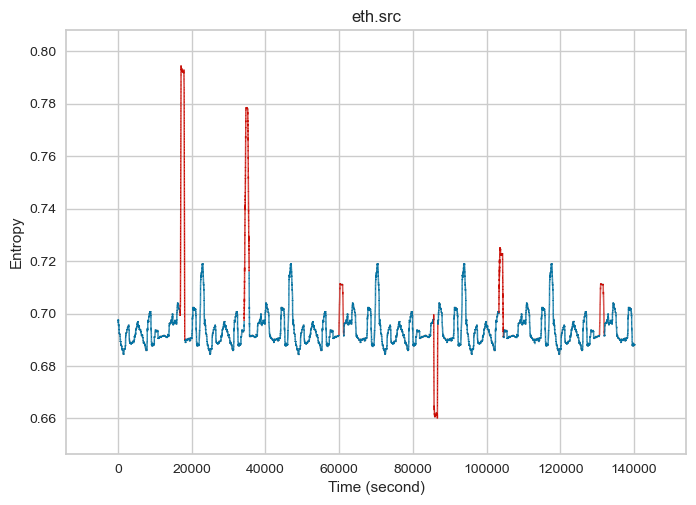

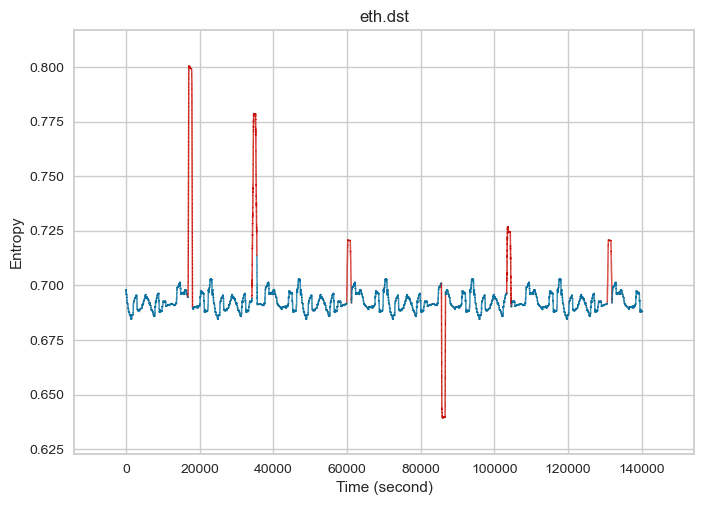

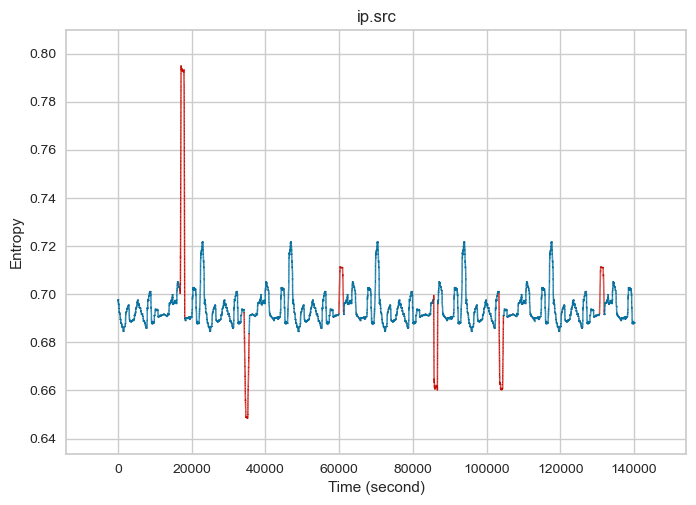

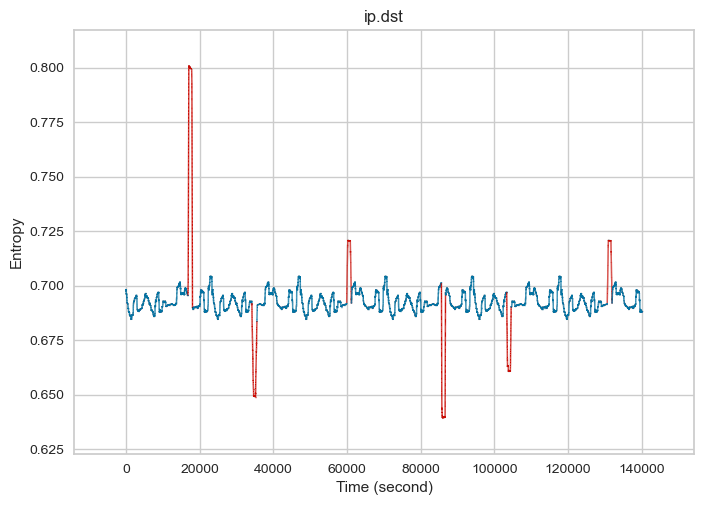

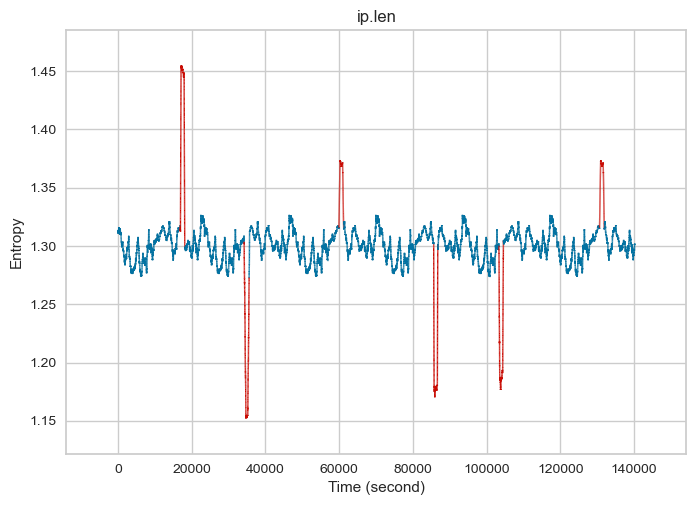

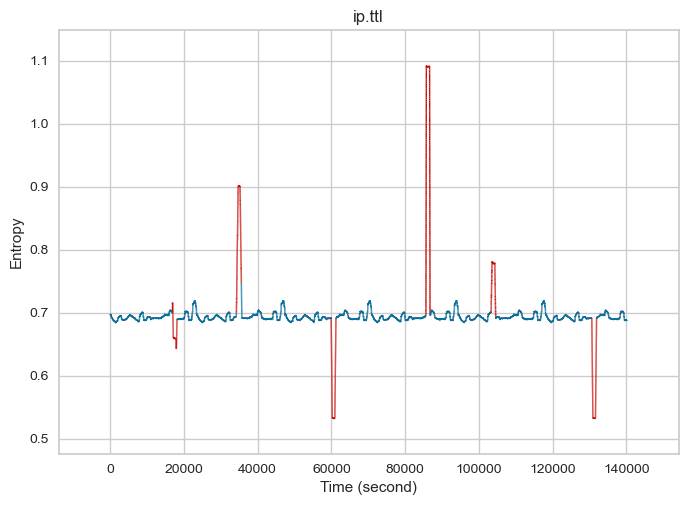

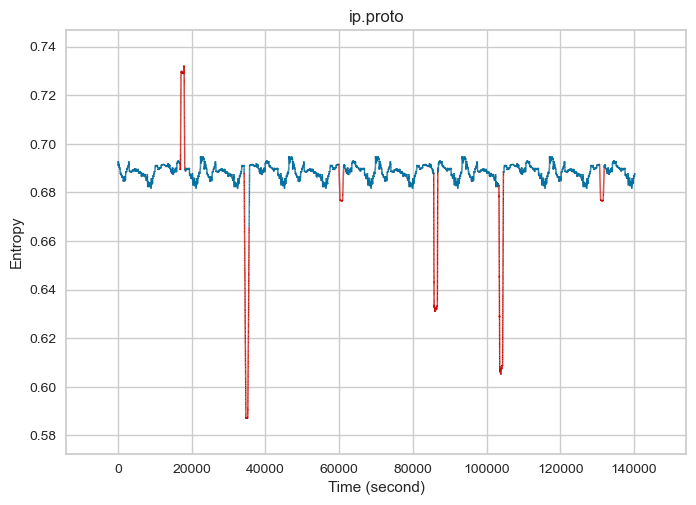

In [10]:
for i in range(0,len(col)-1):
# for i in range(0,1):
    x = range(smooth_entropy.shape[0])
    y = smooth_entropy[:,i]
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    cm = dict(zip(range(0,2,1),list("br")))
    colors = list( map( cm.get , np.isin(x,smooth_time) ))

    lc = LineCollection(segments, colors=colors, linewidths=1)
    fig, ax = plt.subplots()
    ax.add_collection(lc)
    ax.autoscale()
    ax.margins(0.1)
    plt.xlabel('Time (second)')
    plt.ylabel('Entropy')
    plt.title(col[i])
#     plt.savefig('plot/all/smooth/all_'+col[i]+'_smoooth_entropy.pdf') 
    plt.show()

In [11]:
smooth_entropy = pd.DataFrame(smooth_entropy)
smooth_entropy.columns = col

file_entropy = pd.DataFrame(file_entropy)
file_entropy.columns = col

In [12]:
# plotcol = np.asarray([['eth.src', 'eth.dst', 'ip.src', 'ip.dst']
#           ,['ip.len', 'ip.id', 'ip.ttl', 'ip.proto']
#           ,['tcp.srcport', 'tcp.dstport', 'tcp.seq', 'tcp.ack']
#           ,['tcp.flags', 'tcp.window_size', 'tcp.time_delta', 'tcp.time_relative']])

# fig, axs = plt.subplots(4, 4,constrained_layout = True,figsize=(20,10))



# for i in range(len(plotcol)):
#     for j in range(len(plotcol[i,:])):
#         x = range(file_entropy.shape[0])
#         y = file_entropy[plotcol[i,j]]
#         points = np.array([x, y]).T.reshape(-1, 1, 2)
#         segments = np.concatenate([points[:-1], points[1:]], axis=1)
#         cm = dict(zip(range(0,2,1),list("br")))
#         colors = list( map( cm.get , np.isin(x,smooth_time) ))

#         lc = LineCollection(segments, colors=colors, linewidths=1)
#         axs[i, j].plot(x, y)
#         axs[i, j].set_title(plotcol[i,j])
#         axs[i, j].add_collection(lc)
#         axs[i, j].autoscale()
#         axs[i, j].margins(0.1)
#         axs[i, j].set(xlabel='Time (second)', ylabel='Entropy')
        
# plt.savefig('plot/all/entropy/all_entropy.pdf')  

In [13]:
# plotcol = np.asarray([['eth.src', 'eth.dst', 'ip.src', 'ip.dst']
#           ,['ip.len', 'ip.id', 'ip.ttl', 'ip.proto']
#           ,['tcp.srcport', 'tcp.dstport', 'tcp.seq', 'tcp.ack']
#           ,['tcp.flags', 'tcp.window_size', 'tcp.time_delta', 'tcp.time_relative']])

# fig, axs = plt.subplots(4, 4,constrained_layout = True,figsize=(20,10))



# for i in range(len(plotcol)):
#     for j in range(len(plotcol[i,:])):
#         x = range(smooth_entropy.shape[0])
#         y = smooth_entropy[plotcol[i,j]]
#         points = np.array([x, y]).T.reshape(-1, 1, 2)
#         segments = np.concatenate([points[:-1], points[1:]], axis=1)
#         cm = dict(zip(range(0,2,1),list("br")))
#         colors = list( map( cm.get , np.isin(x,smooth_time) ))

#         lc = LineCollection(segments, colors=colors, linewidths=1)
#         axs[i, j].plot(x, y)
#         axs[i, j].set_title(plotcol[i,j])
#         axs[i, j].add_collection(lc)
#         axs[i, j].autoscale()
#         axs[i, j].margins(0.1)
#         axs[i, j].set(xlabel='Time (second)', ylabel='Entropy')
        
# plt.savefig('plot/all/smooth/all_smooth_entropy.pdf')  

In [14]:
X = smooth_entropy.drop(['attack'],axis=1)
setup(X,session_id=123)

,Description,Value
0,session_id,123
1,Original Data,"(140191, 7)"
2,Missing Values,False
3,Numeric Features,7
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(140191, 7)"
9,CPU Jobs,-1


('UNSUPERVISED_DUMMY_TARGET',
 Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='UNSUPERVISED_DUMMY_TARGET',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='most frequent',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None...
                 ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                 ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                 ('cluster_all', 'passthrough'),
                 ('dummy', Dummify(target='UNSUPERVISED_DUMMY_TARGET')),
   

In [15]:
models()

,Name,Reference
ID,,
abod,Angle-base Outlier Detection,pyod.models.abod.ABOD
cluster,Clustering-Based Local Outlier,pyod.models.cblof.CBLOF
cof,Connectivity-Based Local Outlier,pyod.models.cof.COF
iforest,Isolation Forest,pyod.models.iforest.IForest
histogram,Histogram-based Outlier Detection,pyod.models.hbos.HBOS
knn,K-Nearest Neighbors Detector,pyod.models.knn.KNN
lof,Local Outlier Factor,pyod.models.lof.LOF
svm,One-class SVM detector,pyod.models.ocsvm.OCSVM
pca,Principal Component Analysis,pyod.models.pca.PCA


In [ ]:
mcd = create_model('mcd', fraction = 0.054)
save_model(pca,'models/mcd')

In [16]:
cluster = create_model('cluster', fraction = 0.054)
save_model(cluster,'models/cluster')
# cluster_result = assign_model(cluster)
# anomaly = cluster_result['Anomaly']
# anomaly.to_csv('plot/all/result/all_anomaly_value_cluster.csv', index=False)
# pd.DataFrame(smooth_entropy['attack']).to_csv('plot/all/result/all_true_value_cluster.csv', index=False)

# TP = 0
# FP = 0
# TN = 0
# FN = 0
# fp_time = []
# fn_time = []
# for i in range(smooth_entropy.shape[0]):
#     if i not in smooth_time and anomaly[i]==0:
#         TN += 1
#     elif i in smooth_time and anomaly[i]==1:
#         TP += 1
#     elif i in smooth_time and anomaly[i]==0:
#         FN += 1
#         fn_time.append(i)
#     elif i not in smooth_time and anomaly[i]==1:
#         FP += 1
#         fp_time.append(i)

# print("True positive =",TP)
# print("False positive =",FP)
# print("True negative =",TN)
# print("False negative =",FN)

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='UNSUPERVISED_DUMMY_TARGET',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='most frequent',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None...
                 ('fix_perfect', 'passthrough'),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  CBL

In [17]:
iforest = create_model('iforest', fraction = 0.054)
save_model(iforest,'models/iforest')
iforest_result = assign_model(iforest)
print(iforest_result)
# anomaly = iforest_result['Anomaly']
# anomaly.to_csv('plot/all/result/all_anomaly_value_iforest.csv', index=False)
# pd.DataFrame(smooth_entropy['attack']).to_csv('plot/all/result/all_true_value_iforest.csv', index=False)

# TP = 0
# FP = 0
# TN = 0
# FN = 0
# fp_time = []
# fn_time = []
# for i in range(smooth_entropy.shape[0]):
#     if i not in smooth_time and anomaly[i]==0:
#         TN += 1
#     elif i in smooth_time and anomaly[i]==1:
#         TP += 1
#     elif i in smooth_time and anomaly[i]==0:
#         FN += 1
#         fn_time.append(i)
#     elif i not in smooth_time and anomaly[i]==1:
#         FP += 1
#         fp_time.append(i)

# print("True positive =",TP)
# print("False positive =",FP)
# print("True negative =",TN)
# print("False negative =",FN)

Transformation Pipeline and Model Successfully Saved
         eth.src   eth.dst    ip.src    ip.dst    ip.len    ip.ttl  ip.proto  \
0       0.696434  0.696836  0.696594  0.697088  1.311992  0.696434  0.690861   
1       0.696795  0.697150  0.696954  0.697402  1.312708  0.696795  0.691176   
2       0.696795  0.697150  0.696954  0.697402  1.312708  0.696795  0.691176   
3       0.696795  0.697150  0.696954  0.697402  1.312809  0.696795  0.691176   
4       0.696819  0.697175  0.696979  0.697427  1.312735  0.696819  0.691200   
...          ...       ...       ...       ...       ...       ...       ...   
140186  0.688211  0.688160  0.688211  0.688160  1.302249  0.688211  0.687716   
140187  0.688215  0.688164  0.688215  0.688164  1.302437  0.688215  0.687720   
140188  0.688217  0.688166  0.688217  0.688166  1.302475  0.688217  0.687721   
140189  0.688217  0.688166  0.688217  0.688166  1.302475  0.688217  0.687721   
140190  0.688214  0.688163  0.688214  0.688163  1.302513  0.688214 

In [18]:
histogram = create_model('histogram', fraction = 0.054)
save_model(histogram,'models/histogram')
# histogram_result = assign_model(histogram)
# anomaly = histogram_result['Anomaly']
# anomaly.to_csv('plot/all/result/all_anomaly_value_histogram.csv', index=False)
# pd.DataFrame(smooth_entropy['attack']).to_csv('plot/all/result/all_true_value_histogram.csv', index=False)

# TP = 0
# FP = 0
# TN = 0
# FN = 0
# fp_time = []
# fn_time = []
# for i in range(smooth_entropy.shape[0]):
#     if i not in smooth_time and anomaly[i]==0:
#         TN += 1
#     elif i in smooth_time and anomaly[i]==1:
#         TP += 1
#     elif i in smooth_time and anomaly[i]==0:
#         FN += 1
#         fn_time.append(i)
#     elif i not in smooth_time and anomaly[i]==1:
#         FP += 1
#         fp_time.append(i)

# print("True positive =",TP)
# print("False positive =",FP)
# print("True negative =",TN)
# print("False negative =",FN)

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='UNSUPERVISED_DUMMY_TARGET',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='most frequent',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None...
                 ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                 ('cluster_all', 'passthrough'),
                 ('dummy', Dummify(target='UNSUPERVISED_DUMMY_TARGET')),
                 ('fix_perfect', 'passthrough'),
                 ('clean_names', Clean_Colum_Names()),
      

In [19]:
svm = create_model('svm', fraction = 0.054)
save_model(svm,'models/svm')
# svm_result = assign_model(svm)
# anomaly = svm_result['Anomaly']
# anomaly.to_csv('plot/all/result/all_anomaly_value_svm.csv', index=False)
# pd.DataFrame(smooth_entropy['attack']).to_csv('plot/all/result/all_true_value_svm.csv', index=False)

# TP = 0
# FP = 0
# TN = 0
# FN = 0
# fp_time = []
# fn_time = []
# for i in range(smooth_entropy.shape[0]):
#     if i not in smooth_time and anomaly[i]==0:
#         TN += 1
#     elif i in smooth_time and anomaly[i]==1:
#         TP += 1
#     elif i in smooth_time and anomaly[i]==0:
#         FN += 1
#         fn_time.append(i)
#     elif i not in smooth_time and anomaly[i]==1:
#         FP += 1
#         fp_time.append(i)

# print("True positive =",TP)
# print("False positive =",FP)
# print("True negative =",TN)
# print("False negative =",FN)

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='UNSUPERVISED_DUMMY_TARGET',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='most frequent',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None...
                 ('dummy', Dummify(target='UNSUPERVISED_DUMMY_TARGET')),
                 ('fix_perfect', 'passthrough'),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca',

In [20]:
pca = create_model('pca', fraction = 0.054)
save_model(pca,'models/pca')
# pca_result = assign_model(pca)
# anomaly = pca_result['Anomaly']
# anomaly.to_csv('plot/all/result/all_anomaly_value_pca.csv', index=False)
# pd.DataFrame(smooth_entropy['attack']).to_csv('plot/all/result/all_true_value_pca.csv', index=False)

# TP = 0
# FP = 0
# TN = 0
# FN = 0
# fp_time = []
# fn_time = []
# for i in range(smooth_entropy.shape[0]):
#     if i not in smooth_time and anomaly[i]==0:
#         TN += 1
#     elif i in smooth_time and anomaly[i]==1:
#         TP += 1
#     elif i in smooth_time and anomaly[i]==0:
#         FN += 1
#         fn_time.append(i)
#     elif i not in smooth_time and anomaly[i]==1:
#         FP += 1
#         fp_time.append(i)

# print("True positive =",TP)
# print("False positive =",FP)
# print("True negative =",TN)
# print("False negative =",FN)

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='UNSUPERVISED_DUMMY_TARGET',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='most frequent',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None...
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  PCA(contamination=0.054, copy=True, iterated_power='